# <b>Pokemon Dataset Analysis</b>

[You can find the dataset here](https://www.kaggle.com/rounakbanik/pokemon)

 Pokemon is a game and show about a fantasy world in which players aka pokemon trainers can capture, collect, train, and battle elemental creatures called pocket monsters or Pokemon. Many people are familiar with the original 150 pokemon from the first generation . But the company has since expanded to a current total of 801 pokemon. 
 
There are three questions we wanted to answer by analyzing this dataset
1. Which elemental type is the strongest and weakest
2. Which pokemon is the strongest and weakest
3. Based on inputting the data in into a machine learning training model, can we predict the pokemon’s legendary status.]]</br>


 ### <b>Row Description:</b>
Each of the 801 rows represents a single Pokemon

 ### <b>Columns Description:</b> 

 Each Column describes a certain attribute of the pokemon. Below are the columns defined: 

<b>name</b>: The English name of the Pokemon </br>
<b>japanese_name</b>: The Original Japanese name of the Pokemon</br>
<b>pokedex_number</b>: The entry number of the Pokemon in the National Pokedex</br>
<b>percentage_male</b>: The percentage of the species that are male. Blank if the Pokemon is genderless.</br>
<b>type1</b>: The Primary Type of the Pokemon</br>
<b>type2</b>: The Secondary Type of the Pokemon</br>
<b>classification</b>: The Classification of the Pokemon as described by the Sun and Moon Pokedex</br>
<b>height_m</b>: Height of the Pokemon in metres</br>
<b>weight_kg</b>: The Weight of the Pokemon in kilograms</br>
<b>capture_rate</b>: Capture Rate of the Pokemon</br>
<b>baseeggsteps</b>: The number of steps required to hatch an egg of the Pokemon</br>
<b>abilities</b>: A stringified list of abilities that the Pokemon is capable of having</br>
<b>experience_growth</b>: The Experience Growth of the Pokemon</br>
<b>base_happiness</b>: Base Happiness of the Pokemon</br>
<b>hp</b>: The Base HP of the Pokemon</br>
<b>attack</b>: The Base Attack of the Pokemon</br>
<b>defense</b>: The Base Defense of the Pokemon</br>
<b>sp_attack</b>: The Base Special Attack of the Pokemon</br>
<b>sp_defense</b>: The Base Special Defense of the Pokemon</br>
<b>speed</b>: The Base Speed of the Pokemon</br>
<b>generation</b>: The numbered generation which the Pokemon was first introduced</br>
<b>is_legendary</b>: Denotes if the Pokemon is legendary.</br>
<b>against_? columns</b>: 
There are eighteen features in the dataset, prefixed with "against_?"( for ex: against_fire, against_water, etc), that basically denote the factor by which the pokemon gets affected from an attack of that particular against type. 



Here we will load and describe the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

pd.set_option('max_columns',200)
pd.set_option('max_rows',200)
pokemon = pd.read_csv('pokemon-2.csv')

Populating the interactive namespace from numpy and matplotlib


In [3]:
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
print(pokemon.columns)

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')


In [5]:
print(pokemon.dtypes)

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [6]:
print(pokemon.isnull().sum())

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [7]:
print(pokemon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

In [8]:
print(pokemon.describe())

       against_bug  against_dark  against_dragon  against_electric  \
count   801.000000    801.000000      801.000000        801.000000   
mean      0.996255      1.057116        0.968789          1.073970   
std       0.597248      0.438142        0.353058          0.654962   
min       0.250000      0.250000        0.000000          0.000000   
25%       0.500000      1.000000        1.000000          0.500000   
50%       1.000000      1.000000        1.000000          1.000000   
75%       1.000000      1.000000        1.000000          1.000000   
max       4.000000      4.000000        2.000000          4.000000   

       against_fairy  against_fight  against_fire  against_flying  \
count     801.000000     801.000000    801.000000      801.000000   
mean        1.068976       1.065543      1.135456        1.192884   
std         0.522167       0.717251      0.691853        0.604488   
min         0.250000       0.000000      0.250000        0.250000   
25%         1.000000    

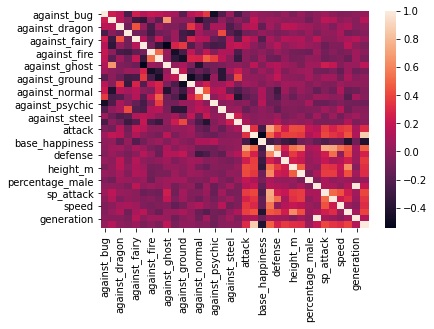

In [9]:
sns.heatmap(pokemon.corr())

# 1) Strongest and Weakest Pokemon Type-combination

Each pokemon has an elemental type for example grass, water, fire. These are very similar to the game rock, paper, scissors where water can defeat fire, fire can defeat grass, and grass can defeat water. Theres a total of 18 different elemental types including rock, electric, flying, psychic, ice, dragon, ghost to name a few. Each element has an effectiveness ratio when it is used against another type. So we took each pokemon’s againsts_type column and made another dataframe that shows the effectiveness of one type against the other.



In [0]:
# for those pokemons with no secondary type, we are filling type2 column with type1 value
# also creating new column combined_type to hold both the primary(type1) and secondary(type2) types
pokemon = pokemon.rename(columns={'against_fight':'against_fighting'})
pokemon['type2'] = pokemon.apply(lambda x: x['type1'] if str(x['type2'])=='nan' else x['type2'],axis=1)
pokemon['combined_type'] = pokemon.type1 + ' ' + pokemon.type2

As we can see in the dataframe below, Water has a x2 or 2.0 effect on a Fire type pokemon as shown in the chart, which means a Water pokemon’s attack on a Fire pokemon is multiplied by two and is twice as effective against Water. Conversely, Fire has a .5 effect on Water so Fire attacks are half as effective. Every type has a certain attack and defense ratio against every other type.

In [12]:
# create type_matrix containing combined_type vs. each against_type
# since the same type combination shows the same effect on each against_type, we can remove duplicates
type_matrix = pokemon[['combined_type','against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fighting', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water']].drop_duplicates()
type_matrix.reset_index(drop=True,inplace=True)
type_matrix = type_matrix.set_index('combined_type').rename(columns={x : x.split('_')[1] for x in type_matrix.columns})
type_matrix

,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
combined_type,,,,,,,,,,,,,,,,,,
grass poison,1.00,1.00,1.0,0.50,0.50,0.50,2.00,2.00,1.0,0.25,1.00,2.00,1.00,1.00,2.00,1.00,1.00,0.50
fire fire,0.50,1.00,1.0,1.00,0.50,1.00,0.50,1.00,1.0,0.50,2.00,0.50,1.00,1.00,1.00,2.00,0.50,2.00
fire flying,0.25,1.00,1.0,2.00,0.50,0.50,0.50,1.00,1.0,0.25,0.00,1.00,1.00,1.00,1.00,4.00,0.50,2.00
water water,1.00,1.00,1.0,2.00,1.00,1.00,0.50,1.00,1.0,2.00,1.00,0.50,1.00,1.00,1.00,1.00,0.50,0.50
bug bug,1.00,1.00,1.0,1.00,1.00,0.50,2.00,2.00,1.0,0.50,0.50,1.00,1.00,1.00,1.00,2.00,1.00,1.00
bug flying,0.50,1.00,1.0,2.00,1.00,0.25,2.00,2.00,1.0,0.25,0.00,2.00,1.00,1.00,1.00,4.00,1.00,1.00
bug poison,0.50,1.00,1.0,1.00,0.50,0.25,2.00,2.00,1.0,0.25,1.00,1.00,1.00,0.50,2.00,2.00,1.00,1.00
normal flying,0.50,1.00,1.0,2.00,1.00,1.00,1.00,1.00,0.0,0.50,0.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00
normal dark,1.00,1.00,1.0,1.00,1.00,2.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


To further complicate the types, many pokemon have two types (i.e. Rock fire) so we had created a new dataframe to account for all the 161 different type combinations that the 801 pokemon have. With the single type pokemon, we simply set its primary and secondary type as the same

In [13]:
# to calculate the above matrix for dual types vs dual types
def dual_matrix_calc(m):
  dual_matrix = pd.DataFrame(index=m.index,columns=m.index)
  dual_matrix.fillna(0,axis=1)
  dual_types = m.index.values
  print(len(dual_types))
  for typ in dual_types:
    for ag_typ in dual_types:
      a,b = ag_typ.split(' ')
      if (a==b):
        dual_matrix.loc[typ,ag_typ] = m.loc[typ,a]
      else:
        dual_matrix.loc[typ,ag_typ] = m.loc[typ,a] * m.loc[typ,b]
  return dual_matrix
dual_matrix = dual_matrix_calc(type_matrix)
dual_matrix

161


combined_type,grass poison,fire fire,fire flying,water water,bug bug,bug flying,bug poison,normal flying,normal dark,poison poison,electric electric,ground ice,poison ground,fairy fairy,fire ice,normal fairy,poison flying,bug grass,ground ground,fighting fighting,water fighting,psychic psychic,water poison,rock ground,water psychic,electric steel,water ice,ghost poison,grass psychic,ground fire,normal normal,ground rock,grass grass,psychic fairy,ice psychic,water flying,rock water,rock flying,ice flying,electric flying,dragon dragon,dragon flying,water electric,fairy flying,psychic flying,water fairy,rock rock,grass flying,water ground,dark dark,dark flying,ghost ghost,normal psychic,bug steel,ground flying,steel ground,bug rock,bug fighting,dark ice,fire rock,ice ground,water rock,steel flying,dark fire,water dragon,rock dark,psychic grass,fire fighting,water grass,grass dark,bug water,grass fighting,bug ground,bug ghost,dark ghost,steel fairy,steel rock,fighting psychic,water dark,fire ground,ground dragon,rock psychic,ground psychic,rock grass,rock bug,ice ice,ice water,steel psychic,steel steel,dragon psychic,grass ground,water steel,normal water,rock steel,ghost flying,poison dark,ghost dark,dragon ground,fighting steel,poison bug,poison fighting,grass ice,psychic fighting,ice ghost,electric ghost,steel dragon,fire steel,ghost dragon,psychic fire,ground steel,grass fairy,ground dark,dark fighting,normal grass,water ghost,bug electric,grass steel,ghost fire,ground electric,ground ghost,dark steel,dark dragon,bug fire,steel fighting,rock fighting,flying flying,dragon fire,dragon electric,dragon ice,fire psychic,normal ground,fire normal,fighting dark,steel ghost,dark psychic,poison water,poison dragon,electric normal,rock dragon,rock ice,fighting flying,electric fairy,rock fairy,ghost grass,flying dragon,psychic ghost,fire water,grass ghost,fire dark,fighting ice,bug fairy,water bug,poison fire,normal fighting,ghost ground,fire dragon,ghost fairy,normal dragon,dragon fighting,psychic steel,rock poison
combined_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
grass poison,0.25,2,4,0.5,1,2,1,2,1,1,0.5,2,1,0.5,4,0.5,2,0.25,1,0.5,0.25,2,0.5,1,1,0.5,1,1,0.5,2,1,1,0.25,1,4,1,0.5,2,4,1,1,2,0.25,1,4,0.25,1,0.5,0.5,1,2,1,2,1,2,1,1,0.5,2,2,2,0.5,2,2,0.5,1,0.5,1,0.125,0.25,0.5,0.125,1,1,1,0.5,1,1,0.5,2,1,2,2,0.25,1,2,1,2,1,2,0.25,0.5,0.5,1,2,1,1,1,0.5,1,0.5,0.5,1,2,0.5,1,2,1,4,1,0.125,1,0.5,0.25,0.5,0.5,0.25,2,0.5,1,1,1,2,0.5,0.5,2,2,0.5,2,4,1,2,0.5,1,2,0.5,1,0.5,1,2,1,0.25,0.5,0.25,2,2,1,0.25,2,1,0.5,0.5,2,0.5,1,2,0.5,1,0.5,2,1
fire fire,0.5,0.5,0.5,2,0.5,0.5,0.5,1,1,1,1,1,2,0.5,0.25,0.5,1,0.25,2,1,2,1,2,4,2,0.5,1,1,0.5,1,1,4,0.5,0.5,0.5,2,4,2,0.5,1,1,1,2,0.5,1,1,2,0.5,4,1,1,1,1,0.25,2,1,1,0.5,0.5,1,1,4,0.5,0.5,2,2,0.5,0.5,1,0.5,1,0.5,1,0.5,1,0.25,1,1,2,1,2,2,2,1,1,0.5,1,0.5,0.5,1,1,1,2,1,1,1,1,2,0.5,0.5,1,0.25,1,0.5,1,0.5,0.25,1,0.5,1,0.25,2,1,0.5,2,0.5,0.25,0.5,2,2,0.5,1,0.25,0.5,2,1,0.5,1,0.5,0.5,2,0.5,1,0.5,1,2,1,1,2,1,1,0.5,1,0.5,1,1,1,0.5,0.5,0.5,0.25,1,0.5,1,2,0.5,0.5,1,1,0.5,2
fire flying,0.25,0.5,0.5,2,0.25,0.25,0.25,1,1,1,2,0,0,0.5,0.5,0.5,1,0.0625,0,0.5,1,1,2,0,2,1,2,1,0.25,0,1,0,0.25,0.5,1,2,8,4,1,2,1,1,4,0.5,1,1,4,0.25,0,1,1,1,1,0.125,0,0,1,0.125,1,2,0,8,0.5,0.5,2,4,0.25,0.25,0.5,0.25,0.5,0.125,0,0.25,1,0.25,2,0.5,2,0,0,4,0,1,1,1,2,0.5,0.5,1,0,1,2,2,1,1,1,0,0.25,0.25,0.5,0.25,0.5,1,2,0.5,0.25,1,0.5,0,0.125,0,0.5,0.25,2,0.5,0.125,0.5,0,0,0.5,1,0.125,0.25,2,1,0.5,2,1,0.5,0,0.5,0.5,0.5,1,2,1,2,4,4,0.5,1,2,0.25,1,1,1,0.25,0.5,0.5,0.125,0.5,0.5,0.5,0,0.5,0.5,1,0.5,0.5,4
water water,2,0.5,0.5,0.5,1,1,1,1,1,1,2,0.5,1,1,0.25,1,1,2,1,1,0.5,1,0.5,1,0.5,1,0.25,1,2,0.5,1,1,2,1,0.5,0.5,0.5,1,0.5,2,1,1,1,1,1,0.5,1,2,0.5,1,1,1,1,0.5,1,0.5,1,1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1,2,0.5,1,2,0.5,2,1,1,1,0.5,0.5,1,0.5,0.5,1,1,1,2,1,0.5,0.25,0.5,0.5,1,2,0.25,0.5,0.5,1,1,1,1,0.5,1,1,1,1,0.5,2,0.5,0.25,1,0.5,0.5,2,1,1,2,0.5,2,1,0.5,2,

So with this data frame, we got the sum of all defense ratio bonus(or disadvantage) each of these elemental types would take from all other types across the row. And to get the sum offense ratio bonus(or advantage) for each elemental type we also had to invert the x and y axis .

In [14]:
# that against_(types) columns hold values for damage taken(defensive) against that particular type. Therefore, we need to calculate the 
# column sum for damage given(offensive)
dual_matrix_defense = dual_matrix.copy()
dual_matrix_offense = dual_matrix.T.copy()
dual_matrix_defense.shape
dual_matrix_offense.shape

(161, 161)

In [15]:
def_total = dual_matrix_defense.apply(lambda x: x.sum(axis=0),axis=1)
def_total = def_total.sort_values(ascending=True)
def_total

combined_type
steel flying          85.6875
steel fairy           95.6250
water steel          100.6250
steel dragon         105.7500
steel ghost          118.2500
steel steel          118.7500
dark ghost           119.5000
ghost dark           119.5000
fighting steel       123.1250
steel fighting       123.1250
dark steel           123.7500
electric flying      125.2500
bug steel            129.8750
water fairy          130.2500
poison dark          131.0000
water flying         134.0000
electric steel       136.6875
electric fairy       137.0000
grass steel          137.3750
steel ground         137.5000
normal fairy         137.5000
ground steel         137.5000
ghost fairy          138.2500
fire steel           138.3125
fairy flying         141.8125
water ghost          142.2500
steel psychic        143.0000
psychic steel        143.0000
poison water         143.2500
water poison         143.2500
poison flying        143.6875
normal flying        143.7500
dark flying          144.7

In [16]:
def_mean = dual_matrix_defense.apply(lambda x: x.mean(axis=0),axis=1)
def_mean = def_mean.sort_values(ascending=True)
def_mean

combined_type
steel flying         0.532220
steel fairy          0.593944
water steel          0.625000
steel dragon         0.656832
steel ghost          0.734472
steel steel          0.737578
dark ghost           0.742236
ghost dark           0.742236
fighting steel       0.764752
steel fighting       0.764752
dark steel           0.768634
electric flying      0.777950
bug steel            0.806677
water fairy          0.809006
poison dark          0.813665
water flying         0.832298
electric steel       0.848991
electric fairy       0.850932
grass steel          0.853261
steel ground         0.854037
normal fairy         0.854037
ground steel         0.854037
ghost fairy          0.858696
fire steel           0.859084
fairy flying         0.880823
water ghost          0.883540
steel psychic        0.888199
psychic steel        0.888199
poison water         0.889752
water poison         0.889752
poison flying        0.892469
normal flying        0.892857
dark flying          0.899

In [17]:
dual_matrix_defense.head()

combined_type,grass poison,fire fire,fire flying,water water,bug bug,bug flying,bug poison,normal flying,normal dark,poison poison,electric electric,ground ice,poison ground,fairy fairy,fire ice,normal fairy,poison flying,bug grass,ground ground,fighting fighting,water fighting,psychic psychic,water poison,rock ground,water psychic,electric steel,water ice,ghost poison,grass psychic,ground fire,normal normal,ground rock,grass grass,psychic fairy,ice psychic,water flying,rock water,rock flying,ice flying,electric flying,dragon dragon,dragon flying,water electric,fairy flying,psychic flying,water fairy,rock rock,grass flying,water ground,dark dark,dark flying,ghost ghost,normal psychic,bug steel,ground flying,steel ground,bug rock,bug fighting,dark ice,fire rock,ice ground,water rock,steel flying,dark fire,water dragon,rock dark,psychic grass,fire fighting,water grass,grass dark,bug water,grass fighting,bug ground,bug ghost,dark ghost,steel fairy,steel rock,fighting psychic,water dark,fire ground,ground dragon,rock psychic,ground psychic,rock grass,rock bug,ice ice,ice water,steel psychic,steel steel,dragon psychic,grass ground,water steel,normal water,rock steel,ghost flying,poison dark,ghost dark,dragon ground,fighting steel,poison bug,poison fighting,grass ice,psychic fighting,ice ghost,electric ghost,steel dragon,fire steel,ghost dragon,psychic fire,ground steel,grass fairy,ground dark,dark fighting,normal grass,water ghost,bug electric,grass steel,ghost fire,ground electric,ground ghost,dark steel,dark dragon,bug fire,steel fighting,rock fighting,flying flying,dragon fire,dragon electric,dragon ice,fire psychic,normal ground,fire normal,fighting dark,steel ghost,dark psychic,poison water,poison dragon,electric normal,rock dragon,rock ice,fighting flying,electric fairy,rock fairy,ghost grass,flying dragon,psychic ghost,fire water,grass ghost,fire dark,fighting ice,bug fairy,water bug,poison fire,normal fighting,ghost ground,fire dragon,ghost fairy,normal dragon,dragon fighting,psychic steel,rock poison
combined_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
grass poison,0.25,2,4,0.5,1,2,1,2,1,1,0.5,2,1,0.5,4,0.5,2,0.25,1,0.5,0.25,2,0.5,1,1,0.5,1,1,0.5,2,1,1,0.25,1,4,1,0.5,2,4,1,1,2,0.25,1,4,0.25,1,0.5,0.5,1,2,1,2,1,2,1,1,0.5,2,2,2,0.5,2,2,0.5,1,0.5,1,0.125,0.25,0.5,0.125,1,1,1,0.5,1,1,0.5,2,1,2,2,0.25,1,2,1,2,1,2,0.25,0.5,0.5,1,2,1,1,1,0.5,1,0.5,0.5,1,2,0.5,1,2,1,4,1,0.125,1,0.5,0.25,0.5,0.5,0.25,2,0.5,1,1,1,2,0.5,0.5,2,2,0.5,2,4,1,2,0.5,1,2,0.5,1,0.5,1,2,1,0.25,0.5,0.25,2,2,1,0.25,2,1,0.5,0.5,2,0.5,1,2,0.5,1,0.5,2,1
fire fire,0.5,0.5,0.5,2,0.5,0.5,0.5,1,1,1,1,1,2,0.5,0.25,0.5,1,0.25,2,1,2,1,2,4,2,0.5,1,1,0.5,1,1,4,0.5,0.5,0.5,2,4,2,0.5,1,1,1,2,0.5,1,1,2,0.5,4,1,1,1,1,0.25,2,1,1,0.5,0.5,1,1,4,0.5,0.5,2,2,0.5,0.5,1,0.5,1,0.5,1,0.5,1,0.25,1,1,2,1,2,2,2,1,1,0.5,1,0.5,0.5,1,1,1,2,1,1,1,1,2,0.5,0.5,1,0.25,1,0.5,1,0.5,0.25,1,0.5,1,0.25,2,1,0.5,2,0.5,0.25,0.5,2,2,0.5,1,0.25,0.5,2,1,0.5,1,0.5,0.5,2,0.5,1,0.5,1,2,1,1,2,1,1,0.5,1,0.5,1,1,1,0.5,0.5,0.5,0.25,1,0.5,1,2,0.5,0.5,1,1,0.5,2
fire flying,0.25,0.5,0.5,2,0.25,0.25,0.25,1,1,1,2,0,0,0.5,0.5,0.5,1,0.0625,0,0.5,1,1,2,0,2,1,2,1,0.25,0,1,0,0.25,0.5,1,2,8,4,1,2,1,1,4,0.5,1,1,4,0.25,0,1,1,1,1,0.125,0,0,1,0.125,1,2,0,8,0.5,0.5,2,4,0.25,0.25,0.5,0.25,0.5,0.125,0,0.25,1,0.25,2,0.5,2,0,0,4,0,1,1,1,2,0.5,0.5,1,0,1,2,2,1,1,1,0,0.25,0.25,0.5,0.25,0.5,1,2,0.5,0.25,1,0.5,0,0.125,0,0.5,0.25,2,0.5,0.125,0.5,0,0,0.5,1,0.125,0.25,2,1,0.5,2,1,0.5,0,0.5,0.5,0.5,1,2,1,2,4,4,0.5,1,2,0.25,1,1,1,0.25,0.5,0.5,0.125,0.5,0.5,0.5,0,0.5,0.5,1,0.5,0.5,4
water water,2,0.5,0.5,0.5,1,1,1,1,1,1,2,0.5,1,1,0.25,1,1,2,1,1,0.5,1,0.5,1,0.5,1,0.25,1,2,0.5,1,1,2,1,0.5,0.5,0.5,1,0.5,2,1,1,1,1,1,0.5,1,2,0.5,1,1,1,1,0.5,1,0.5,1,1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1,2,0.5,1,2,0.5,2,1,1,1,0.5,0.5,1,0.5,0.5,1,1,1,2,1,0.5,0.25,0.5,0.5,1,2,0.25,0.5,0.5,1,1,1,1,0.5,1,1,1,1,0.5,2,0.5,0.25,1,0.5,0.5,2,1,1,2,0.5,2,1,0.5,2,

In [0]:
off_total = dual_matrix_offense.apply(lambda x: x.sum(),axis=1)

In [0]:
off_mean = dual_matrix_offense.apply(lambda x: x.mean(),axis=1)

In [20]:
print(off_total.sort_values(ascending=False))

combined_type
water ground         284.0000
ice flying           249.6250
fire flying          244.0000
rock ice             238.6250
rock flying          235.8750
fairy flying         235.0000
water fighting       233.2500
rock water           233.0000
water rock           233.0000
ice water            232.6250
water ice            232.6250
fire ice             231.6875
dark ghost           228.2500
ghost dark           228.2500
fire rock            225.0000
dragon ice           222.2500
ground ghost         221.0000
ghost ground         221.0000
water grass          218.5000
ice ghost            218.5000
dark ice             218.2500
rock ground          217.5000
ground rock          217.5000
ground dark          217.0000
grass ground         216.5625
rock dark            215.0000
rock fairy           211.2500
water steel          211.0000
rock steel           210.7500
steel rock           210.7500
water ghost          206.7500
fire fighting        206.7500
fire ground          206.7

In [21]:
print(off_mean.sort_values(ascending=False))

combined_type
water ground         1.763975
ice flying           1.550466
fire flying          1.515528
rock ice             1.482143
rock flying          1.465062
fairy flying         1.459627
water fighting       1.448758
rock water           1.447205
water rock           1.447205
ice water            1.444876
water ice            1.444876
fire ice             1.439053
dark ghost           1.417702
ghost dark           1.417702
fire rock            1.397516
dragon ice           1.380435
ground ghost         1.372671
ghost ground         1.372671
water grass          1.357143
ice ghost            1.357143
dark ice             1.355590
rock ground          1.350932
ground rock          1.350932
ground dark          1.347826
grass ground         1.345109
rock dark            1.335404
rock fairy           1.312112
water steel          1.310559
rock steel           1.309006
steel rock           1.309006
water ghost          1.284161
fire fighting        1.284161
fire ground          1.284

[Text(0, 0, 'bug bug'),
 Text(0, 0, 'bug electric'),
 Text(0, 0, 'bug fairy'),
 Text(0, 0, 'bug fighting'),
 Text(0, 0, 'bug fire'),
 Text(0, 0, 'bug flying'),
 Text(0, 0, 'bug ghost'),
 Text(0, 0, 'bug grass'),
 Text(0, 0, 'bug ground'),
 Text(0, 0, 'bug poison'),
 Text(0, 0, 'bug rock'),
 Text(0, 0, 'bug steel'),
 Text(0, 0, 'bug water'),
 Text(0, 0, 'dark dark'),
 Text(0, 0, 'dark dragon'),
 Text(0, 0, 'dark fighting'),
 Text(0, 0, 'dark fire'),
 Text(0, 0, 'dark flying'),
 Text(0, 0, 'dark ghost'),
 Text(0, 0, 'dark ice'),
 Text(0, 0, 'dark psychic'),
 Text(0, 0, 'dark steel'),
 Text(0, 0, 'dragon dragon'),
 Text(0, 0, 'dragon electric'),
 Text(0, 0, 'dragon fighting'),
 Text(0, 0, 'dragon fire'),
 Text(0, 0, 'dragon flying'),
 Text(0, 0, 'dragon ground'),
 Text(0, 0, 'dragon ice'),
 Text(0, 0, 'dragon psychic'),
 Text(0, 0, 'electric electric'),
 Text(0, 0, 'electric fairy'),
 Text(0, 0, 'electric flying'),
 Text(0, 0, 'electric ghost'),
 Text(0, 0, 'electric normal'),
 Text(0, 0,

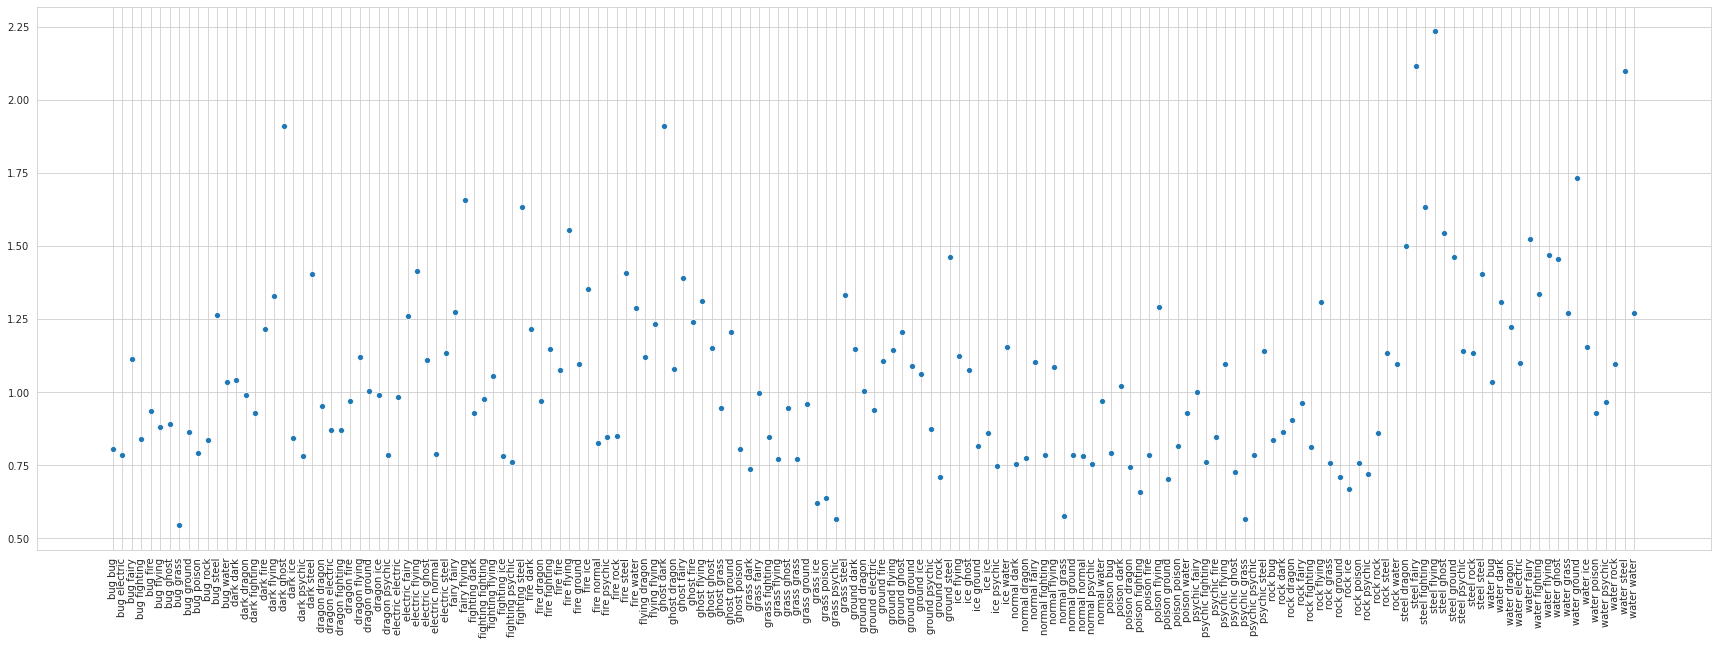

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(30,10))
final_type_scores = off_total/def_total
final_type_scores.sort_values(ascending=False)
chart = sns.scatterplot(data=final_type_scores)
chart.set_xticklabels(final_type_scores.index, rotation=90)

In [23]:
# strongest and weakest types are: 
print('Strongest Type: {}\n Weakest Type: {}'.format(final_type_scores.idxmax(),final_type_scores.idxmin()))

Strongest Type: steel flying
 Weakest Type: bug grass


With the sum of the average offense and defense ratio of each pokemon type, we discovered that Steel Flying has the highest rate of bonus attack and bonus defense against all other types. and bug grass would be the lowest. In other words, if we were playing rock paper scissors with the 161 different pokemon type combinations, picking Steel Flying would give you the best chance of winning.

# 2) The strongest and weakest pokemons

Next, we want to find the strongest and weakest Pokémon. Most common analysis on Pokémon strength are just based on subjective opinion or from lore, or by simply summing up the base power stats like speed, hp, offense, defense, special_attack and special_defense. However, we believe our analysis will be a more accurate representation of the strongest and weakest Pokémon because we give more weight to the pokemon’s elemental type combination. The elemental type combination can drastically change the outcome of a battle between two pokemon with the same base power stats. 

So to determine this, we took each pokemon’s elemental type combination along with it’s offense and defense ratio gathered from the previous question, and combined it with the pokemon’s special_attack and special_defence stat. These special defense and offense stats determine how much an elemental attack or defense bonus has on this pokemon’s attack or defense respectively. With the pokemon’s combo type ratio multiplied by its special stats, we then multiply those stats with the base power stats of the Pokémon to find the strongest. 

<b>Power Score </b> = 
(elemental combo type offense ratio *  by special_attack + elemental combo type defense ratio * special_defense) * ( speed + attack + defense + hp)


In [0]:
pokemon_stats = pokemon[['name','hp','attack','defense','sp_attack','sp_defense','speed','combined_type']].copy()
pokemon_stats['sp_attack_with_type'] = pokemon_stats.apply(lambda x: x['sp_attack']*off_mean.loc[x['combined_type']],axis=1)
pokemon_stats['sp_defense_with_type'] = pokemon_stats.apply(lambda x: x['sp_defense']*def_mean.loc[x['combined_type']],axis=1)
pokemon_stats['combined_sp'] = pokemon_stats['sp_attack_with_type'] + pokemon_stats['sp_defense_with_type']
pokemon_stats['power_score'] = (pokemon_stats['hp']+pokemon_stats['attack']+pokemon_stats['defense']+pokemon_stats['speed']) * (pokemon_stats['combined_sp'])

In [25]:
pokemon_stats[pokemon_stats.power_score==pokemon_stats.power_score.max()]

,name,hp,attack,defense,sp_attack,sp_defense,speed,combined_type,sp_attack_with_type,sp_defense_with_type,combined_sp,power_score
645,Kyurem,125,120,90,170,100,95,dragon ice,234.673913,139.440994,374.114907,160869.409938


In [26]:
pokemon_stats[pokemon_stats.power_score==pokemon_stats.power_score.min()]

,name,hp,attack,defense,sp_attack,sp_defense,speed,combined_type,sp_attack_with_type,sp_defense_with_type,combined_sp,power_score
128,Magikarp,20,10,55,15,20,80,water water,17.748447,18.63354,36.381988,6003.02795


By applying our analysis, we can find out that the strongest is ‘Kyurem’ and the weakest is ‘Magikarp’. Here is Mewtwo's stats for comparison. Most other analysis will site Mewtwo as the most powerful pokemon.

In [27]:
pokemon_stats[pokemon_stats.name=='Mewtwo']

,name,hp,attack,defense,sp_attack,sp_defense,speed,combined_type,sp_attack_with_type,sp_defense_with_type,combined_sp,power_score
149,Mewtwo,106,150,70,194,120,140,psychic psychic,184.962733,146.086957,331.049689,154269.15528


In [0]:
final_ranking = pokemon_stats[['name','power_score']].set_index('name')

If you wanted to go into a pokemon duel, you may only take 6 pokemon into battle. Here are the top strongest pokemon you would want to take.

In [29]:
final_ranking.nlargest(6,columns='power_score')

,power_score
name,
Kyurem,160869.409938
Rayquaza,156366.459627
Groudon,156086.645963
Kyogre,155681.366460
Diancie,154686.490683
Mewtwo,154269.155280


In [30]:
final_ranking.nsmallest(10,columns='power_score')

,power_score
name,
Magikarp,6003.027950
Weedle,6534.549689
Caterpie,6551.397516
Azurill,6885.559006
Wurmple,7826.397516
Scatterbug,8098.403727
Kakuna,8168.187112
Metapod,8189.246894
Silcoon,8189.246894


# 3) Legendary status predictive modelling

In [31]:
df = pokemon.copy()
df.isnull().sum()

abilities             0
against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fighting      0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
classfication         0
defense               0
experience_growth     0
height_m             20
hp                    0
japanese_name         0
name                  0
percentage_male      98
pokedex_number        0
sp_attack             0
sp_defense            0
speed                 0
type1                 0
type2                 0
weight_kg            20
generation            0
is_legendary          0
combined_type   

# Data Cleaning
## Null Values
### 4 columns have missing values : height_m, %_male, type2, weight_kg

#### 1) Height_m:

We imputed the height_m value with the mean of the population.

mean:1.163892445582586, median:1.0, mode:0.6


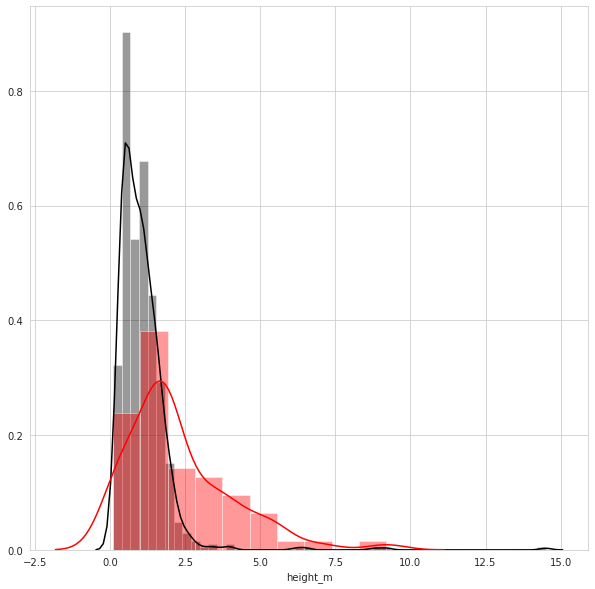

In [32]:
# height_m

print("mean:{}, median:{}, mode:{}".format(df.height_m.mean(),df.height_m.median(),df.height_m.value_counts().idxmax()))
plt.figure(figsize=(10,10))
sns.distplot(df[df.is_legendary==0]['height_m'],color='black')
sns.distplot(df[df.is_legendary==1]['height_m'],color='red')
df.height_m.fillna(df.height_m.mean(),inplace=True)

#### 2) Percentage_male:

We mapped the 6 distinct values to meaningful categorical values and imputed the nan values with the mode of the population.

In [33]:
# percentage_male
print("mean:{}, median:{}, mode:{}".format(df.percentage_male.mean(),df.percentage_male.median(),df.percentage_male.value_counts().nlargest()))


mean:55.155761024181935, median:50.0, mode:50.0    501
88.1    111
0.0      27
24.6     24
75.4     19
Name: percentage_male, dtype: int64


In [0]:
gender_dict = {
    '88.1' : 'majorly male',
    '50.0' : 'equal',
    '0.0' : 'purely female',
    '100.0' : 'purely male',
    '24.6' : 'majorly female',
    '75.4' : 'majorly male',
    '11.2' : 'majorly female',
    'nan' : 'equal'
}

In [0]:
df.percentage_male = df.percentage_male.apply(lambda x: gender_dict[str(x)])

#### 3) Weight_kg:
We imputed the weight_kg nan values with the median value.

mean:61.37810499359791, median:27.3, mode:15.0


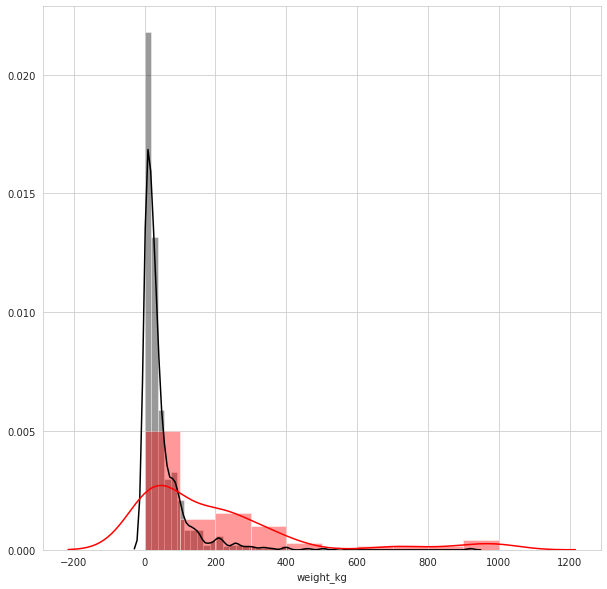

In [36]:
# weight_kg
print("mean:{}, median:{}, mode:{}".format(df.weight_kg.mean(),df.weight_kg.median(),df.weight_kg.value_counts().idxmax()))
plt.figure(figsize=(10,10))
df.weight_kg.fillna(df.weight_kg.median(),inplace=True)
sns.distplot(df[df.is_legendary==0]['weight_kg'],color='black')
sns.distplot(df[df.is_legendary==1]['weight_kg'],color='red')

## EDA

#### 1) type2: 
Lets make a number_of_types column and drop both the types.

In [0]:

df['number_of_types'] = df.type2.apply(lambda x: 1 if str(x)=='nan' else 2)
df.drop(columns=['type2'],inplace=True)

In [0]:
df.drop(columns=['type1'],inplace=True)

#### 2) capture_rate:
Capture_Rate column is of datatype object. Lets convert it into float.

In [0]:
# the capture_rate column can be converted into float

row = df[df.name=='Minior'].copy()
df.drop(df[df.name=='Minior'].index.values[0],inplace=True)
row['name'] = 'Minior(Meteorite)'
row['capture_rate'] = '30'
df = df.append(row)
row['name'] = 'Minior(core)'
row['capture_rate'] = '255'
df = df.append(row)
df.capture_rate = df.capture_rate.astype(float)

#### 3) Classification:
This column has a total of 588 unique categorical values. So we decided to drop this column.

In [40]:
#classfication feature
pd.crosstab(df.is_legendary,df.classfication)

classfication,Abundance Pokémon,Acorn Pokémon,Alpha Pokémon,Angler Pokémon,Ant Pit Pokémon,Anteater Pokémon,Antenna Pokémon,Aquamouse Pokémon,Aquarabbit Pokémon,Arm Thrust Pokémon,Armor Bird Pokémon,Armor Pokémon,Arrow Quill Pokémon,Artificial Pokémon,Astral Body Pokémon,Atrocious Pokémon,Attaching Pokémon,Aura Pokémon,Aurora Pokémon,Automaton Pokémon,Avianoid Pokémon,Axe Jaw Pokémon,Bagworm Pokémon,Ball Pokémon,Ball Roll Pokémon,Ball Whale Pokémon,Balloon Pokémon,Barnacle Pokémon,Barrier Pokémon,Bash Buffalo Pokémon,Bat Pokémon,Battery Pokémon,Beak Pokémon,Beaver Pokémon,Beckon Pokémon,Bee Fly Pokémon,Beehive Pokémon,Bell Pokémon,Big Boss Pokémon,Big Eater Pokémon,Big Horn Pokémon,Big Jaw Pokémon,Big Voice Pokémon,Big-Hearted Pokémon,Bird Pokémon,Bite Pokémon,Bivalve Pokémon,Blade Pokémon,Blade Quill Pokémon,Blast Pokémon,Blast Turtle Pokémon,Blaze Pokémon,Blazing Pokémon,Blimp Pokémon,Bloom Sickle Pokémon,Blossom Pokémon,Bolt Strike Pokémon,Bone Keeper Pokémon,Bone Vulture Pokémon,Bonsai Pokémon,Bounce Pokémon,Boundary Pokémon,Bouquet Pokémon,Boxing Pokémon,Bright Pokémon,Bronze Bell Pokémon,Bronze Pokémon,Brutal Pokémon,Brutal Star Pokémon,Bubble Frog Pokémon,Bubble Jet Pokémon,Bud Pokémon,Bug Catcher Pokémon,Bugle Beak Pokémon,Bulb Pokémon,Butterfly Pokémon,Cactus Pokémon,Candle Pokémon,Cannon Pokémon,Carefree Pokémon,Caring Pokémon,Cat Ferret Pokémon,Catty Pokémon,Cavalry Pokémon,Cave Pokémon,Cavern Pokémon,Cell Pokémon,Centipede Pokémon,Cerebral Pokémon,Cheering Pokémon,Cherry Pokémon,Chick Pokémon,Chill Pokémon,Chimp Pokémon,Chinchilla Pokémon,Clamping Pokémon,Clap Pokémon,Classy Cat Pokémon,Clay Doll Pokémon,Clear Wing Pokémon,...,Stag Beetle Pokémon,Stagbeetle Pokémon,Stakeout Pokémon,Star Shape Pokémon,Starling Pokémon,Starshape Pokémon,Steam Pokémon,Stomach Pokémon,Stone Home Pokémon,String Spit Pokémon,Strong Arm Pokémon,Stump Pokémon,Subterrene Pokémon,Sun Pokémon,Sunne Pokémon,Superpower Pokémon,Swallow Pokémon,Swine Pokémon,Swollen Pokémon,Sword Blade Pokémon,Sword Pokémon,Symbol Pokémon,Synthetic Pokémon,Tadpole Pokémon,Teamwork Pokémon,Temporal Pokémon,Tender Pokémon,Thorn Monkey Pokémon,Thorn Pod Pokémon,Thorn Pokémon,Thorn Seed Pokémon,Thunder Pokémon,Thunderbolt Pokémon,Tiger Cat Pokémon,Time Travel Pokémon,Tiny Bee Pokémon,Tiny Bird Pokémon,Tiny Leaf Pokémon,Tiny Mouse Pokémon,Tiny Pigeon Pokémon,Tiny Racoon Pokémon,Tiny Robin Pokémon,Tiny Turtle Pokémon,TinySwallow Pokémon,Torch Pokémon,Toxic Lizard Pokémon,Toxic Mouth Pokémon,Trainee Pokémon,Transform Pokémon,Transport Pokémon,Trap Pokémon,Trash Bag Pokémon,Trash Heap Pokémon,Tricky Fox Pokémon,Triple Bird Pokémon,Tundra Pokémon,Turn Tail Pokémon,Turtle Pokémon,Tusk Pokémon,Twin Bird Pokémon,Twin Tusk Pokémon,Two-Handed Pokémon,Valiant Pokémon,Vast White Pokémon,Verdant Pokémon,Vibration Pokémon,Victory Pokémon,Vine Pokémon,Virtual Pokémon,Volcano Pokémon,Water Bird Pokémon,Water Bubble Pokémon,Water Fish Pokémon,Water Gun Pokémon,Water Weed Pokémon,Weather Pokémon,Weed Pokémon,Whiskers Pokémon,Whisper Pokémon,White Bird Pokémon,Wickid Pokémon,Wild Bull Pokémon,Wild Duck Pokémon,Wild Monkey Pokémon,Wild Pigeon Pokémon,Willpower Pokémon,Wily Pokémon,Wind Chime Pokémon,Windveiled Pokémon,Wing Fish Pokémon,Wish Pokémon,Wolf Pokémon,Wood Gecko Pokémon,Woodpecker Pokémon,Wool Pokémon,Woolly Crab Pokémon,Worm Pokémon,Wrestling Pokémon,Young Fowl Pokémon,Zen Charm Pokémon
is_legendary,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,1,1,1,1,1,1,1,2,1,0,1,1,1,1,0,2,1,2,4,2,1,1,5,1,1,1,4,1,1,1,1,2,1,1,1,1,1,3,1,1,2,2,3,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,2,2,2,1,1,1,1,1,2,2,1,1,1,1,1,1,1,2,0,1,1,2,2,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,2,1,0,1,1,1,1,1,1,3,0,3,1,1,0,1,2,1,2,4,1,0,1,1,1,1,1,0,2,1,0,1,2,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,0,1,3,0,2,3,2,2,2,2,1,1,1,2,2,1,1,1,1,1,1,1,0,1,1,1,1,

In [41]:
df.classfication.nunique()

588

In [0]:
# since there are a lot of classfication categorical values, lets drop this column
df = df.drop(columns=['classfication'])

In [0]:
# lets drop name columns
df = df.drop(columns=['name','japanese_name'])

#### 4) Against_? columns
Since the type values in the against columns are same across different types of pokemons and dont vary with respect to its legendary status, we are dropping these columns.

In [0]:
# lets remove the against_ columns 
df = df.drop(columns=['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fighting', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water','pokedex_number'])

#### 5) Generation:
Since all generations produce almost the same number of legendary pokemons, lets drop this column.

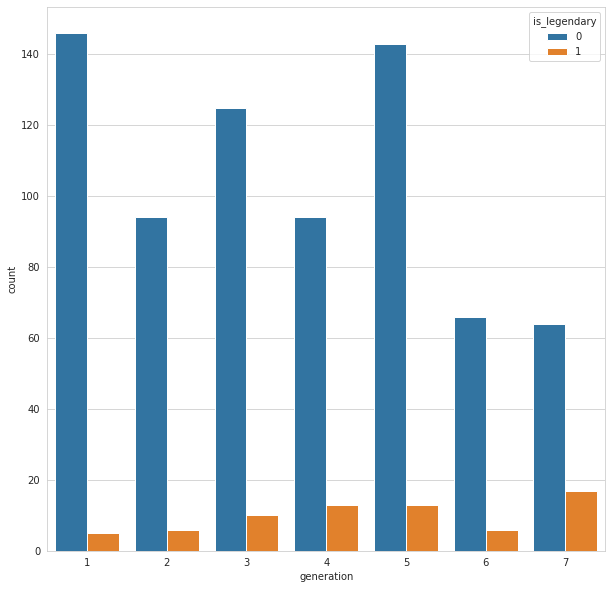

In [45]:
plt.figure(figsize=(10,10))
sns.countplot(df.generation,hue=df.is_legendary)

In [0]:
df = df.drop(columns=['generation'])

#### 6) Abilities:
Lets create a new column for number of abilities that a pokemon has, and drop the abilities column.

In [47]:
df['number_of_abilities'] = df.apply(lambda row: len(row['abilities'].split(',')),axis=1)
df = df.drop(columns = 'abilities')
df.number_of_abilities.unique()

array([2, 1, 3, 6, 4])

#### Correlation among the features

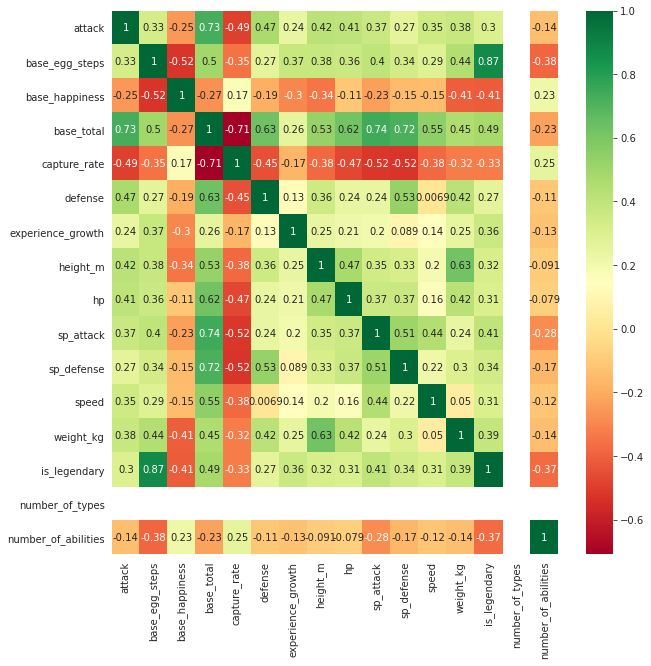

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap ='RdYlGn')

#### 1) Base stats: hp, speed, attack, defense, sp_attack, sp_defense
Base total = attack + defense + hp + sp.attack + sp.defense + speed. Therefore these columns and base total will have a high correlation. 

In [0]:

df = df.drop(columns=['attack','defense','hp','sp_attack','sp_defense','speed'])

#### 2) Capture_rate: 
Lets drop capture_rate since it is highly correlated with base_total.

In [0]:
df = df.drop(columns=['capture_rate'])

#### 3) Weight_kg:
Height_m and weight_kg are highly correlated. Therefore, lets drop weight_kg.

In [0]:
df.drop('weight_kg',axis=1,inplace=True)

In [52]:
# now we have our clean dataset
df

,base_egg_steps,base_happiness,base_total,experience_growth,height_m,percentage_male,is_legendary,combined_type,number_of_types,number_of_abilities
0,5120,70,318,1059860,0.7,majorly male,0,grass poison,2,2
1,5120,70,405,1059860,1.0,majorly male,0,grass poison,2,2
2,5120,70,625,1059860,2.0,majorly male,0,grass poison,2,2
3,5120,70,309,1059860,0.6,majorly male,0,fire fire,2,2
4,5120,70,405,1059860,1.1,majorly male,0,fire fire,2,2
...,...,...,...,...,...,...,...,...,...,...
798,30720,0,570,1250000,5.5,equal,1,dark dragon,2,1
799,30720,0,600,1250000,2.4,equal,1,psychic psychic,2,1
800,30720,0,600,1250000,1.0,equal,1,steel fairy,2,1
773,6400,70,500,1059860,0.3,equal,0,rock flying,2,1


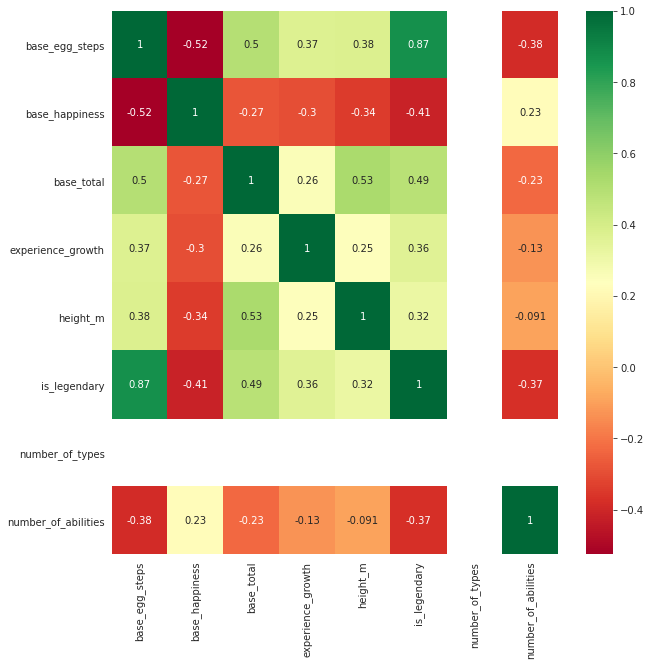

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap ='RdYlGn')

# Feature Scaling

As you can observe, our features have ranges with highly varying orders of magnitude. Hence, we normalized the features acorss our dataset to approximately scale them over the same range. 

In [0]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

numerical =  pd.DataFrame(sc_X.fit_transform(df[['base_egg_steps', 'base_happiness', 'base_total', 'experience_growth',
       'height_m','number_of_types','number_of_abilities']]),columns=['base_egg_steps', 'base_happiness', 'base_total', 'experience_growth',
       'height_m','number_of_types','number_of_abilities'],index= df.index
        )

In [0]:
df_scaled = df.copy()
df_scaled[['base_egg_steps', 'base_happiness', 'base_total', 'experience_growth',
       'height_m','number_of_types','number_of_abilities']] = numerical[['base_egg_steps', 'base_happiness', 'base_total', 'experience_growth',
       'height_m','number_of_types','number_of_abilities']]

In [0]:
df_scaled_ready = pd.get_dummies(data=df_scaled,columns=['percentage_male'])

In [0]:
df_scaled_ready = df_scaled_ready.drop(columns=['combined_type'])

In [58]:
df_scaled_ready

,base_egg_steps,base_happiness,base_total,experience_growth,height_m,is_legendary,number_of_types,number_of_abilities,percentage_male_equal,percentage_male_majorly female,percentage_male_majorly male,percentage_male_purely female,percentage_male_purely male
0,-0.316030,0.236635,-0.927652,0.030352,-0.434225,0,0.0,-0.556737,0,0,1,0,0
1,-0.316030,0.236635,-0.197061,0.030352,-0.152757,0,0.0,-0.556737,0,0,1,0,0
2,-0.316030,0.236635,1.650411,0.030352,0.785468,0,0.0,-0.556737,0,0,1,0,0
3,-0.316030,0.236635,-1.003230,0.030352,-0.528048,0,0.0,-0.556737,0,0,1,0,0
4,-0.316030,0.236635,-0.197061,0.030352,-0.058935,0,0.0,-0.556737,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,3.592309,-3.339322,1.188543,1.218311,4.069257,1,0.0,-1.722542,1,0,0,0,0
799,3.592309,-3.339322,1.440471,1.218311,1.160758,1,0.0,-1.722542,1,0,0,0,0
800,3.592309,-3.339322,1.440471,1.218311,-0.152757,1,0.0,-1.722542,1,0,0,0,0
773,-0.120613,0.236635,0.600711,0.030352,-0.809515,0,0.0,-1.722542,1,0,0,0,0


In [59]:
for i in df_scaled_ready.columns:
  print("{} : Range : {}".format(i,df_scaled_ready[i].max()-df_scaled_ready[i].min()))

base_egg_steps : Range : 4.4945896080369785
base_happiness : Range : 7.151914068038284
base_total : Range : 5.038558521239436
experience_growth : Range : 6.4977265201076815
height_m : Range : 13.510446945687553
is_legendary : Range : 1
number_of_types : Range : 0.0
number_of_abilities : Range : 5.829024080160883
percentage_male_equal : Range : 1
percentage_male_majorly female : Range : 1
percentage_male_majorly male : Range : 1
percentage_male_purely female : Range : 1
percentage_male_purely male : Range : 1


In [0]:
x = df_scaled_ready.drop(["is_legendary"],axis=1)
y = df_scaled_ready.is_legendary

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 2,test_size=0.4,stratify=y)

In [62]:
X_train.shape

(481, 12)

In [63]:
y_train.shape

(481,)

# Class imbalance

In order to avoid overfitting, we oversampled the minority class data points, using the SMOTE module, in the training dataset(initially 481 rows, now 878 rows). 

In [64]:
df_scaled_ready.is_legendary.value_counts()

0    732
1     70
Name: is_legendary, dtype: int64

In [65]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [66]:
sm = SMOTE(random_state=2, ratio = 'minority')
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [67]:
x_train_res.shape

(878, 12)

In [68]:
y_train_res.shape

(878,)

## Machine Learning

We used KNN classification algorithm and varied the k (number of neignours) value from 1 to 15. We got the best f1 score 0.90 for k = [1,2,4,5,6,8].

In [0]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train_res,y_train_res)
    
    train_scores.append(knn.score(x_train_res,y_train_res))
    test_scores.append(knn.score(X_test,y_test))

In [70]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1, 2]


In [71]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 98.13084112149532 % and k = [1, 2, 4, 5, 6, 8]


In [72]:
knn = KNeighborsClassifier(2)

knn.fit(x_train_res,y_train_res)
knn.score(X_test,y_test)

0.9813084112149533

In [0]:
y_pred = knn.predict(X_test)

As observed below, our model misclassified only 6 normal pokemons as legendary pokemons.

Text(0.5, 15.0, 'Predicted label')

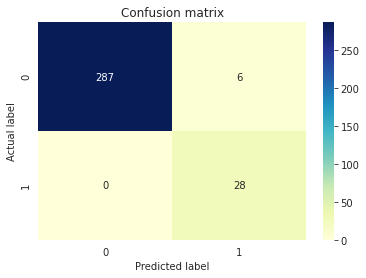

In [74]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [75]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.9032258064516129

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       293
           1       0.82      1.00      0.90        28

    accuracy                           0.98       321
   macro avg       0.91      0.99      0.95       321
weighted avg       0.98      0.98      0.98       321



 #                            Thank You